## 1.4.15 Image Segmentation with Watershed Algorithm

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('coin1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

(Text(0.5,1,'Threshold Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

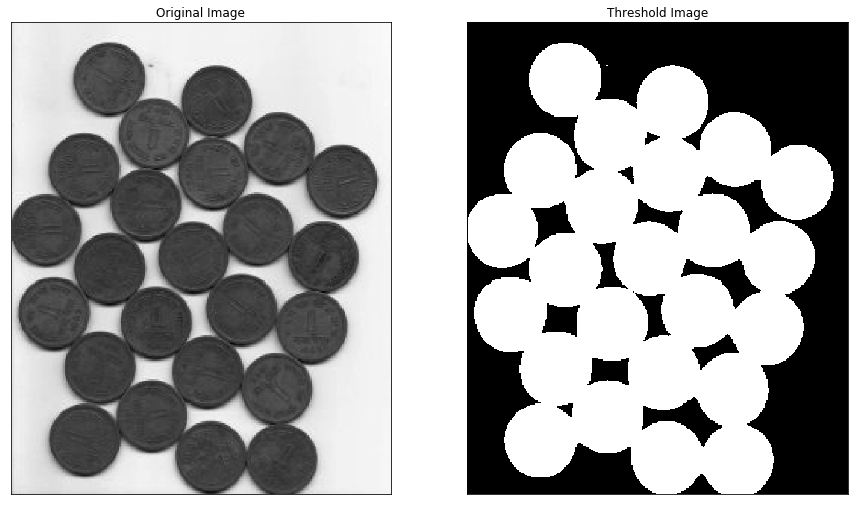

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])

In [5]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [6]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

(Text(0.5,1,'Background area'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

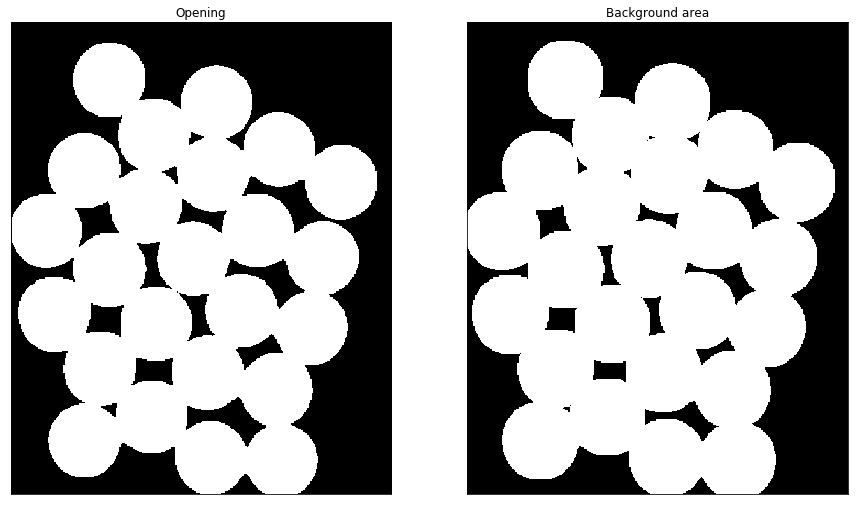

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(opening,cmap = 'gray')
plt.title('Opening'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_bg, cmap = 'gray')
plt.title('Background area'), plt.xticks([]), plt.yticks([])

In [8]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [9]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

(Text(0.5,1,'sure_fg'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

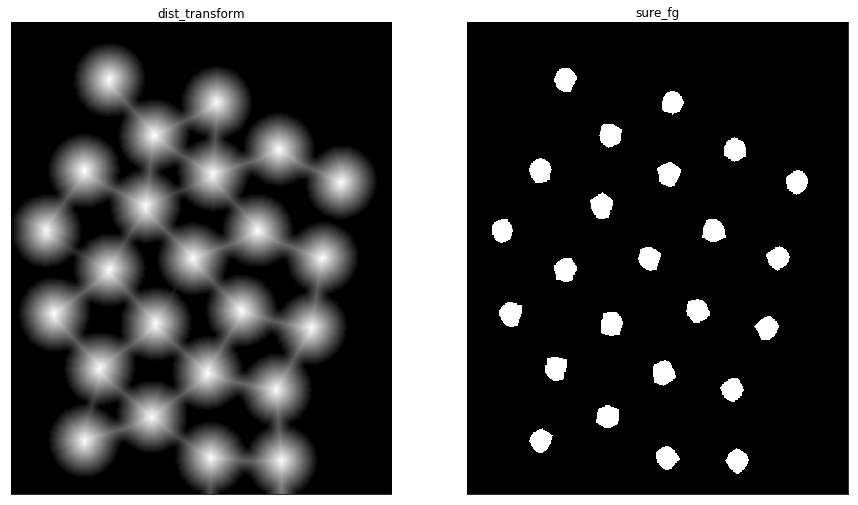

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(dist_transform,cmap = 'gray')
plt.title('dist_transform'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg, cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'unknown'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

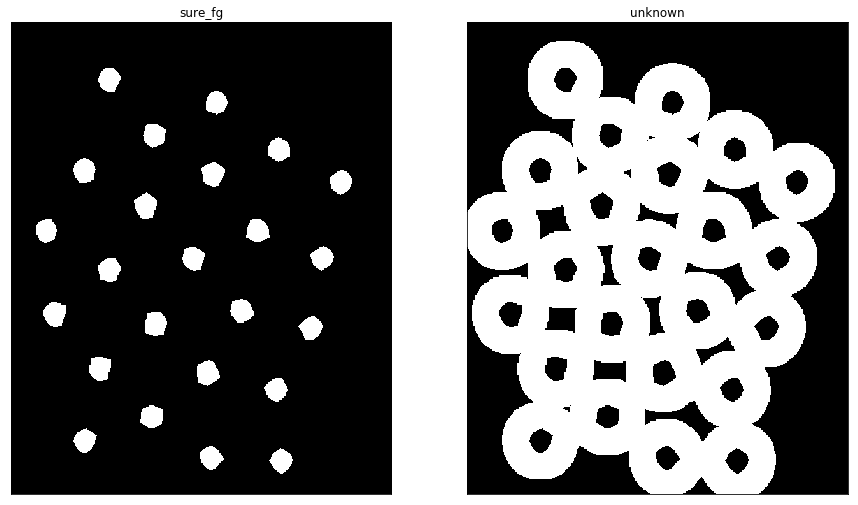

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unknown, cmap = 'gray')
plt.title('unknown'), plt.xticks([]), plt.yticks([])

In [12]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [13]:
markers.shape

(742, 598)

(Text(0.5,1,'markers'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

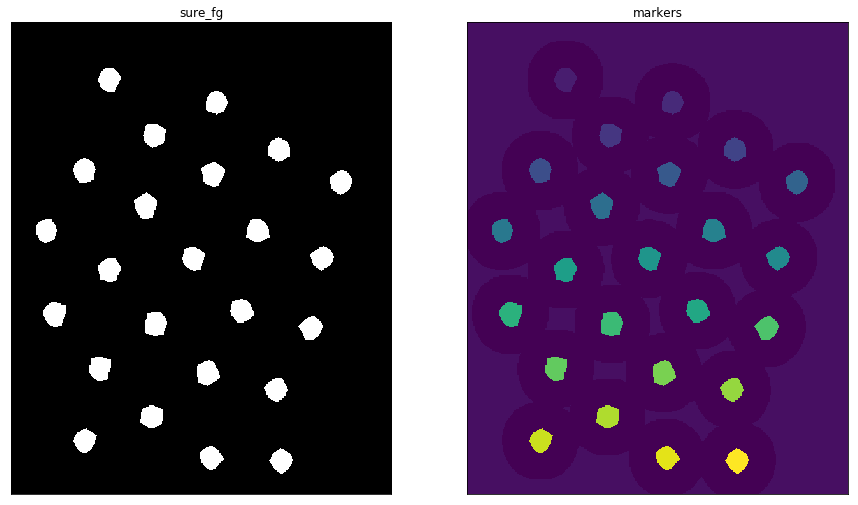

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers)
plt.title('markers'), plt.xticks([]), plt.yticks([])

In [16]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

(Text(0.5,1,'markers'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

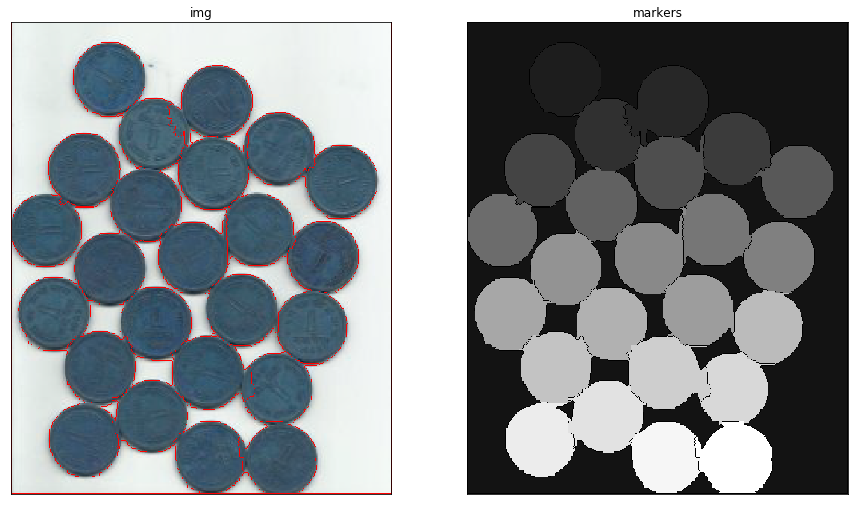

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers, cmap='gray')
plt.title('markers'), plt.xticks([]), plt.yticks([])